In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setup path

import os
import sys

# From jupyter notebook, starting from Tensor-Completion/
'''
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
'''

# From google colab
# Add parent packages to path
sys.path.append("/content/drive/My Drive/Tensor-Completion")
sys.path.append("/content/drive/My Drive/Tensor-Completion/Code")

# Add lib directory, containing the required libraries, to path
sys.path.append("/content/drive/My Drive/lib")

In [0]:
try:
  import cupy as cp
except:
  pass

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

from Models.CP_WOPT import CP_WOPT_Model
from metrics import RSE
from Utils import mask_img

img shape:  (256, 256, 3)


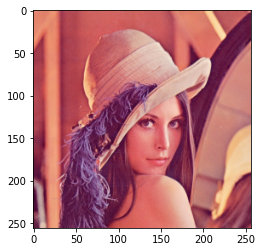

In [4]:
# Read lena image
img_path = '/content/drive/My Drive/Tensor-Completion/Code/data/lena_red.bmp'

img = cv2.imread(img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
plt.imshow(img)
print("img shape: ", img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


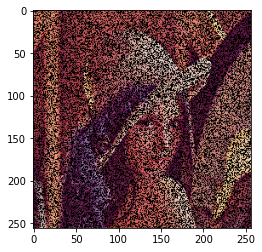

In [5]:
# Mask image
img = cp.asarray(img) # If using cupy

missing_rate=0.5
img_missing = mask_img(img, missing_rate=missing_rate)

#plt.imshow(img_missing) # If using numpy
plt.imshow(cp.asnumpy(img_missing).astype(int)) # If using cupy

In [7]:
# Create and train model using gradient descent

model = CP_WOPT_Model(img_missing, 24, 1e-6, init="normal", seed=0)
model.train(10000)

Epoch: 0, Loss: 9994.641597017364
Epoch: 1, Loss: 9993.080574153735
Epoch: 2, Loss: 9991.666061181444
Epoch: 3, Loss: 9990.368761350059
Epoch: 4, Loss: 9989.163054061994
Epoch: 5, Loss: 9988.025961887168
Epoch: 6, Loss: 9986.936269135453
Epoch: 7, Loss: 9985.873719802588
Epoch: 8, Loss: 9984.81823173899
Epoch: 9, Loss: 9983.74906386469
Epoch: 10, Loss: 9982.643864178297
Epoch: 11, Loss: 9981.477506233443
Epoch: 12, Loss: 9980.220586231151
Epoch: 13, Loss: 9978.837393619087
Epoch: 14, Loss: 9977.28307034976
Epoch: 15, Loss: 9975.499511457632
Epoch: 16, Loss: 9973.409284800326
Epoch: 17, Loss: 9970.906372469033
Epoch: 18, Loss: 9967.841692287135
Epoch: 19, Loss: 9963.999813810278
Epoch: 20, Loss: 9959.060364008345
Epoch: 21, Loss: 9952.531891730103
Epoch: 22, Loss: 9943.634258873251
Epoch: 23, Loss: 9931.080596641745
Epoch: 24, Loss: 9912.653518087876
Epoch: 25, Loss: 9884.335975161184
Epoch: 26, Loss: 9838.416121720855
Epoch: 27, Loss: 9759.058179499063
Epoch: 28, Loss: 9611.12931687419

KeyboardInterrupt: ignored

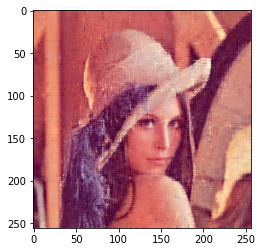

In [0]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [0]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.08965219715600267


In [0]:
# Create and train model using ncg

model = CP_WOPT_Model(img_missing, 24, 1e-6, init="normal", optimization="ncg", seed=0)
model.train(10000)
print("normalized loss: ", model.train_logs)

         Current function value: 6541641.655103
         Iterations: 10000
         Function evaluations: 15450
         Gradient evaluations: 15450
normalized loss:  66.54502009178275


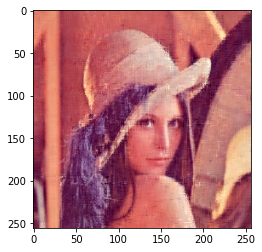

In [0]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [0]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.0855086696009656
